In [1]:
import numpy as np
import pandas as pd
import sqlite3
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

/kaggle/input/earthquake-magnitude-damage-and-impact/csv_building_ownership_and_use.csv
/kaggle/input/earthquake-magnitude-damage-and-impact/csv_household_resources.csv
/kaggle/input/earthquake-magnitude-damage-and-impact/csv_household_earthquake_impact.csv
/kaggle/input/earthquake-magnitude-damage-and-impact/csv_individual_demographics.csv
/kaggle/input/earthquake-magnitude-damage-and-impact/csv_building_structure.csv
/kaggle/input/earthquake-magnitude-damage-and-impact/csv_household_demographics.csv
/kaggle/input/earthquake-magnitude-damage-and-impact/mapping.csv
/kaggle/input/earthquake-magnitude-damage-and-impact/ward_vdcmun_district_name_mapping.csv
/kaggle/input/earthquake-magnitude-damage-and-impact/csv_building_damage_assessment.csv


In [3]:
# assign dataset names
list_of_names = ['csv_building_ownership_and_use','csv_household_resources', 'csv_household_earthquake_impact',
                 'csv_individual_demographics', 'csv_building_structure', 'csv_household_demographics', 'mapping', 'ward_vdcmun_district_name_mapping',
                'csv_building_damage_assessment']

# create empty list
dataframes_list = []
  
# append datasets into the list
for i in range(len(list_of_names)):
    data_df = pd.read_csv('/kaggle/input/earthquake-magnitude-damage-and-impact/'+list_of_names[i]+".csv", low_memory=False)
    dataframes_list.append(data_df)

In [4]:
#checking the shape of each df
print(dataframes_list[0].shape)
print(dataframes_list[1].shape)
print(dataframes_list[2].shape)
print(dataframes_list[3].shape)
print(dataframes_list[4].shape)
print(dataframes_list[5].shape)
print(dataframes_list[6].shape)
print(dataframes_list[7].shape)
print(dataframes_list[8].shape)

(762106, 17)
(747365, 36)
(747365, 28)
(3677133, 11)
(762106, 31)
(747365, 11)
(3677133, 3)
(949, 5)
(762106, 79)


In [5]:
#assigning elements of dataframes list to individual df's

building_ownership_and_use = dataframes_list[0]
household_resources = dataframes_list[1]
household_earthquake_impact = dataframes_list[2]
individual_demographics = dataframes_list[3]
building_structure = dataframes_list[4]
household_demographics = dataframes_list[5]
mapping = dataframes_list[6]
ward_vdcmun_district_name_mapping = dataframes_list[7]
building_damage_assessment = dataframes_list[8]

In [6]:
print('Building ownership and use nans')
print()
print(building_ownership_and_use.isnull().sum())
print('******************')
print()
print('Household resources nans')
print()
print(household_resources.isnull().sum())
print('******************')
print()
print('Household earyhquake impact nans')
print()
print(household_earthquake_impact.isnull().sum())
print('******************')
print()
print('Individual demographics nans')
print()
print(individual_demographics.isnull().sum())
print('******************')
print()
print('Building structure nans')
print()
print(building_structure.isnull().sum())
print('******************')
print()
print('Household demographics nans')
print()
print(household_demographics.isnull().sum())
print('******************')
print()
print('Mapping nans')
print()
print(mapping.isnull().sum())
print('******************')
print()
print('Ward district name mapping nans')
print()
print(ward_vdcmun_district_name_mapping.isnull().sum())
print('******************')
print()
print('Building damage assesment nans')
print()
print(building_damage_assessment.isnull().sum())

Building ownership and use nans

building_id                       0
district_id                       0
vdcmun_id                         0
ward_id                           0
legal_ownership_status            0
count_families                    2
has_secondary_use                10
has_secondary_use_agriculture     0
has_secondary_use_hotel           0
has_secondary_use_rental          0
has_secondary_use_institution     0
has_secondary_use_school          0
has_secondary_use_industry        0
has_secondary_use_health_post     0
has_secondary_use_gov_office      0
has_secondary_use_use_police      0
has_secondary_use_other           0
dtype: int64
******************

Household resources nans

household_id                                      0
district_id                                       0
vdcmun_id                                         0
ward_id                                           0
source_water_pre_eq                             228
source_water_post_eq                

In [7]:
#Creating earthquake sqlite database
conn = sqlite3.connect('earthquake.db')

#converting pandas dfs into sql tables
building_ownership_and_use.to_sql('building_ownership_and_use', conn, index=False, if_exists='replace')
household_resources.to_sql('household_resources', conn, index=False, if_exists='replace')
household_earthquake_impact.to_sql('household_earthquake_impact', conn, index=False, if_exists='replace')
individual_demographics.to_sql('individual_demographics', conn, index=False, if_exists='replace')
building_structure.to_sql('building_structure', conn, index=False, if_exists='replace')
household_demographics.to_sql('household_demographics', conn, index=False, if_exists='replace')
mapping.to_sql('mapping', conn, index=False, if_exists='replace')
ward_vdcmun_district_name_mapping.to_sql('ward_vdcmun_district_name_mapping', conn, index=False, if_exists='replace')
building_damage_assessment.to_sql('building_damage_assessment', conn, index=False, if_exists='replace')


In [8]:
tables = pd.read_sql("""

SELECT *
FROM sqlite_master
WHERE type = 'table';

""", conn)

tables

,type,name,tbl_name,rootpage,sql
0,table,building_ownership_and_use,building_ownership_and_use,2,"CREATE TABLE ""building_ownership_and_use"" (\n""..."
1,table,household_resources,household_resources,8090,"CREATE TABLE ""household_resources"" (\n""househo..."
2,table,household_earthquake_impact,household_earthquake_impact,34889,"CREATE TABLE ""household_earthquake_impact"" (\n..."
3,table,individual_demographics,individual_demographics,60539,"CREATE TABLE ""individual_demographics"" (\n""ind..."
4,table,building_structure,building_structure,128652,"CREATE TABLE ""building_structure"" (\n""building..."
5,table,household_demographics,household_demographics,164732,"CREATE TABLE ""household_demographics"" (\n""hous..."
6,table,mapping,mapping,178177,"CREATE TABLE ""mapping"" (\n""individual_id"" INTE..."
7,table,ward_vdcmun_district_name_mapping,ward_vdcmun_district_name_mapping,205728,"CREATE TABLE ""ward_vdcmun_district_name_mappin..."
8,table,building_damage_assessment,building_damage_assessment,205742,"CREATE TABLE ""building_damage_assessment"" (\n""..."


In [9]:
pd.set_option('max_columns', 180)
pd.set_option('max_rows', 200000)
pd.set_option('max_colwidth', 5000)

## Building ownership and use

In [10]:
pd.read_sql("""

SELECT *
FROM building_ownership_and_use;

""", conn)

,building_id,district_id,vdcmun_id,ward_id,legal_ownership_status,count_families,has_secondary_use,has_secondary_use_agriculture,has_secondary_use_hotel,has_secondary_use_rental,has_secondary_use_institution,has_secondary_use_school,has_secondary_use_industry,has_secondary_use_health_post,has_secondary_use_gov_office,has_secondary_use_use_police,has_secondary_use_other
0,120101000011,12,1207,120703,Private,1.0,0.0,0,0,0,0,0,0,0,0,0,0
1,120101000021,12,1207,120703,Private,1.0,0.0,0,0,0,0,0,0,0,0,0,0
2,120101000031,12,1207,120703,Private,1.0,0.0,0,0,0,0,0,0,0,0,0,0
3,120101000041,12,1207,120703,Private,1.0,0.0,0,0,0,0,0,0,0,0,0,0
4,120101000051,12,1207,120703,Private,1.0,0.0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
762101,366709001241,36,3603,360302,Private,1.0,0.0,0,0,0,0,0,0,0,0,0,0
762102,366709001251,36,3603,360302,Private,1.0,0.0,0,0,0,0,0,0,0,0,0,0
762103,366709001261,36,3603,360302,Private,1.0,0.0,0,0,0,0,0,0,0,0,0,0
762104,366709001271,36,3603,360302,Private,1.0,0.0,0,0,0,0,0,0,0,0,0,0


## Household resources

In [11]:
pd.read_sql("""

SELECT *
FROM household_resources;

""", conn)

,household_id,district_id,vdcmun_id,ward_id,source_water_pre_eq,source_water_post_eq,source_cooking_fuel_pre_eq,source_cooking_fuel_post_eq,source_light_pre_eq,source_light_post_eq,type_toilet_pre_eq,type_toilet_post_eq,has_asset_land_pre_eq,has_asset_tv_pre_eq,has_asset_cable_pre_eq,has_asset_computer_pre_eq,has_asset_internet_pre_eq,has_asset_telephone_pre_eq,has_asset_mobile_phone_pre_eq,has_asset_fridge_pre_eq,has_asset_motorcycle_pre_eq,has_asset_four_wheeler_family_use_pre_eq,has_asset_four_wheeler_commercial_use_pre_eq,has_asset_none_pre_eq,has_asset_land_post_eq,has_asset_tv_post_eq,has_asset_cable_post_eq,has_asset_computer_post_eq,has_asset_internet_post_eq,has_asset_telephone_post_eq,has_asset_mobile_phone_post_eq,has_asset_fridge_post_eq,has_asset_motorcycle_post_eq,has_asset_four_wheeler_family_use_post_eq,has_asset_four_wheeler_commercial_post_eq,has_asset_none_post_eq
0,12010100001101,12,1207,120703,Pipeline,Pipeline,Wood,Wood,Electricity,Electricity,Simple,Simple,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0
1,12010100002101,12,1207,120703,Pipeline,Pipeline,Wood,Wood,Electricity,Electricity,Simple,Simple,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0
2,12010100003101,12,1207,120703,Pipeline,Pipeline,Wood,Wood,Electricity,Electricity,Simple,Simple,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0
3,12010100004101,12,1207,120703,Pipeline,Pipeline,Wood,Wood,Electricity,Electricity,Simple,Simple,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0
4,12010100005101,12,1207,120703,Pipeline,Pipeline,Wood,Wood,Electricity,Electricity,Simple,Flush-out lavatory with septic tank,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
747360,36670900124101,36,3603,360302,Spring,Spring,Wood,Wood,Electricity,Solar,No toilet,No toilet,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0
747361,36670900125101,36,3603,360302,Spring,Spring,Wood,Wood,Electricity,Solar,No toilet,No toilet,1,1,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0
747362,36670900126101,36,3603,360302,Pipeline,Pipeline,Wood,Wood,Electricity,Electricity,Flush-out lavatory connected to public sewage line,Flush-out lavatory connected to public sewage line,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0
747363,36670900127101,36,3603,360302,Spring,Spring,Wood,Wood,Electricity,Solar,Flush-out lavatory with septic tank,Flush-out lavatory with septic tank,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0


## Household earthquake impact 

In [12]:
pd.read_sql("""

SELECT *
FROM household_earthquake_impact;

""", conn)

,household_id,district_id,vdcmun_id,ward_id,shelter_condition_household_post_eq,residence_household_pre_eq,residence_household_post_eq,household_eq_id_type,has_death_occurred_last_12_months,count_death_last_12_months,has_injury_loss_occurred_last_12_months,count_injury_loss_last_12_months,has_education_drop_occurred_last_12_months,count_education_drop_last_12_months,has_pregnancy_treatment_drop_occurred_last_12_months,count_pregnancy_treatment_drop_last_12_months,has_vaccination_drop_occurred_last_12_months,count_vaccination_drop_last_12_months,has_occupation_change_occurred_last_12_months,count_occupation_change_last_12_months,residence_district_household_head_pre_eq,residence_district_household_head_post_eq,is_recipient_rahat_15k,is_recipient_rahat_10k,is_recipient_rahat_200k,is_recipient_rahat_social_security_3k,is_recipient_rahat_none,is_ineligible_rahat
0,12010100001101,12,1207,120703,Staying in their own house,This VDC/Municipality,This VDC/Municipality,ID Card for Total Destruction,0.0,NaN,0.0,NaN,1.0,1.0,NaN,NaN,NaN,NaN,0.0,NaN,None,None,1,1,0,0,0,0
1,12010100002101,12,1207,120703,Staying in their own house,This VDC/Municipality,This VDC/Municipality,Have not received ID Card,0.0,NaN,0.0,NaN,NaN,NaN,NaN,NaN,0.0,NaN,0.0,NaN,None,None,0,0,0,0,1,0
2,12010100003101,12,1207,120703,Staying in their own house,This VDC/Municipality,This VDC/Municipality,Have not received ID Card,0.0,NaN,0.0,NaN,0.0,NaN,0.0,NaN,0.0,NaN,0.0,NaN,None,None,0,0,0,0,1,0
3,12010100004101,12,1207,120703,Staying in their own house,This VDC/Municipality,This VDC/Municipality,Have not received ID Card,0.0,NaN,0.0,NaN,0.0,NaN,0.0,NaN,0.0,NaN,0.0,NaN,None,None,0,0,0,0,1,0
4,12010100005101,12,1207,120703,Staying in their own house,This VDC/Municipality,This VDC/Municipality,Have not received ID Card,0.0,NaN,0.0,NaN,0.0,NaN,0.0,NaN,0.0,NaN,0.0,NaN,None,None,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
747360,36670900124101,36,3603,360302,Temporary shelter,This VDC/Municipality,This VDC/Municipality,ID Card for Total Destruction,0.0,NaN,0.0,NaN,0.0,NaN,0.0,NaN,0.0,NaN,0.0,NaN,None,None,1,1,0,0,0,0
747361,36670900125101,36,3603,360302,Temporary shelter,This VDC/Municipality,This VDC/Municipality,ID Card for Total Destruction,1.0,2.0,1.0,1.0,0.0,NaN,0.0,NaN,0.0,NaN,0.0,NaN,None,None,1,1,0,0,0,0
747362,36670900126101,36,3603,360302,Others,Other district,Other district,ID Card for Total Destruction,1.0,1.0,0.0,NaN,0.0,NaN,0.0,NaN,0.0,NaN,0.0,NaN,Kathmandu,Kathmandu,1,1,0,0,0,0
747363,36670900127101,36,3603,360302,Temporary shelter,This VDC/Municipality,This VDC/Municipality,ID Card for Total Destruction,0.0,NaN,0.0,NaN,0.0,NaN,0.0,NaN,0.0,NaN,0.0,NaN,None,None,1,1,0,0,0,0


## Individual demographics

In [13]:
pd.read_sql("""

SELECT *
FROM individual_demographics;

""", conn)

,individual_id,district_id,vdcmun_id,ward_id,gender_individual,age_individual,presence_in_household,disability_individual,has_registered_birth,education_level_individual,marital_status_individual
0,12010100001101001,12,1207,120703,Male,31,Mostly Present,No,NaN,Illiterate,Married
1,12010100001101002,12,1207,120703,Female,58,Mostly Present,No,NaN,Illiterate,Married
2,12010100001101003,12,1207,120703,Male,15,Mostly Present,No,NaN,Class 7,Not Married
3,12010100002101001,12,1207,120703,Female,62,Mostly Present,No,NaN,Illiterate,Widow/Widower
4,12010100002101002,12,1207,120703,Male,23,Not present-Abroad,No,NaN,Class 6,Married
...,...,...,...,...,...,...,...,...,...,...,...
3677128,36670900127101001,36,3603,360302,Female,65,Mostly Present,No,NaN,Illiterate,Widow/Widower
3677129,36670900128101001,36,3603,360302,Male,40,Mostly Present,No,NaN,Class 9,Married
3677130,36670900128101002,36,3603,360302,Female,37,Not present-Same Country,No,NaN,Class 8,Married
3677131,36670900128101003,36,3603,360302,Male,19,Not present-Same Country,No,NaN,SLC or equivalent,Not Married


## Building structure

In [14]:
pd.read_sql("""

SELECT *
FROM building_structure;

""", conn)

,building_id,district_id,vdcmun_id,ward_id,count_floors_pre_eq,count_floors_post_eq,age_building,plinth_area_sq_ft,height_ft_pre_eq,height_ft_post_eq,land_surface_condition,foundation_type,roof_type,ground_floor_type,other_floor_type,position,plan_configuration,has_superstructure_adobe_mud,has_superstructure_mud_mortar_stone,has_superstructure_stone_flag,has_superstructure_cement_mortar_stone,has_superstructure_mud_mortar_brick,has_superstructure_cement_mortar_brick,has_superstructure_timber,has_superstructure_bamboo,has_superstructure_rc_non_engineered,has_superstructure_rc_engineered,has_superstructure_other,condition_post_eq,damage_grade,technical_solution_proposed
0,120101000011,12,1207,120703,1,1,9,288,9,9,Flat,Other,Bamboo/Timber-Light roof,Mud,Not applicable,Not attached,Rectangular,0,1,0,0,0,0,0,1,0,0,0,Damaged-Used in risk,Grade 3,Major repair
1,120101000021,12,1207,120703,1,1,15,364,9,9,Flat,Other,Bamboo/Timber-Light roof,Mud,Not applicable,Not attached,Rectangular,0,1,0,0,0,0,0,1,0,0,0,Damaged-Repaired and used,Grade 5,Reconstruction
2,120101000031,12,1207,120703,1,1,20,384,9,9,Flat,Other,Bamboo/Timber-Light roof,Mud,Not applicable,Not attached,Rectangular,0,1,0,0,0,0,0,0,0,0,0,Damaged-Repaired and used,Grade 2,Minor repair
3,120101000041,12,1207,120703,1,1,20,312,9,9,Flat,Other,Bamboo/Timber-Light roof,Mud,Not applicable,Not attached,Rectangular,0,1,0,0,0,0,0,0,0,0,0,Damaged-Repaired and used,Grade 2,Minor repair
4,120101000051,12,1207,120703,1,1,30,308,9,9,Flat,Other,Bamboo/Timber-Light roof,Mud,Not applicable,Not attached,Rectangular,0,1,0,0,0,0,0,0,0,0,0,Damaged-Repaired and used,Grade 1,Minor repair
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
762101,366709001241,36,3603,360302,2,0,60,165,18,0,Flat,Mud mortar-Stone/Brick,Bamboo/Timber-Heavy roof,Mud,Timber-Planck,Attached-2 side,Rectangular,0,1,0,0,0,0,0,0,0,0,0,Damaged-Rubble clear,Grade 5,Reconstruction
762102,366709001251,36,3603,360302,2,0,35,342,18,0,Flat,Mud mortar-Stone/Brick,Bamboo/Timber-Heavy roof,Mud,Timber-Planck,Attached-1 side,Rectangular,0,1,0,0,0,0,0,0,0,0,0,Damaged-Rubble clear,Grade 5,Reconstruction
762103,366709001261,36,3603,360302,2,0,35,342,18,0,Flat,Mud mortar-Stone/Brick,Bamboo/Timber-Heavy roof,Mud,Timber-Planck,Not attached,Rectangular,0,1,0,0,0,0,0,0,0,0,0,Damaged-Rubble clear,Grade 5,Reconstruction
762104,366709001271,36,3603,360302,2,0,19,306,18,0,Flat,Mud mortar-Stone/Brick,Bamboo/Timber-Heavy roof,Mud,Timber-Planck,Not attached,Rectangular,0,1,0,0,0,0,0,0,0,0,0,Damaged-Rubble clear,Grade 5,Reconstruction


In [15]:
damage_grouped = pd.read_sql("""

SELECT damage_grade, COUNT(damage_grade) AS 'Count'
FROM building_structure
WHERE damage_grade IS NOT NULL
GROUP BY damage_grade

""", conn)
damage_grouped

,damage_grade,Count
0,Grade 1,78815
1,Grade 2,87257
2,Grade 3,136412
3,Grade 4,183844
4,Grade 5,275766


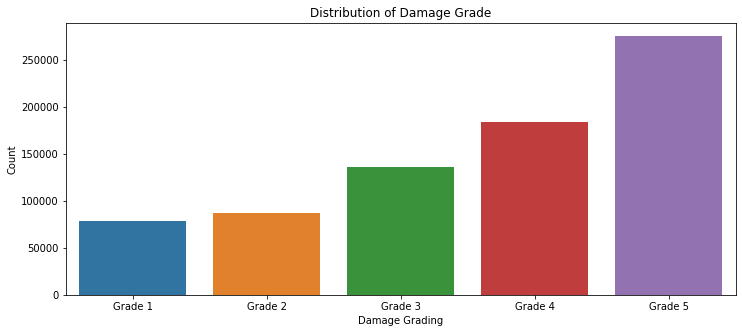

In [16]:

plt.figure(figsize=(12,5))
ax = sns.barplot(x='damage_grade', y='Count',data=damage_grouped, order = ['Grade 1', 'Grade 2', 'Grade 3', 'Grade 4', 'Grade 5'])
plt.title("Distribution of Damage Grade")
plt.xlabel("Damage Grading")
plt.show()


## household_demographics

In [17]:
pd.read_sql("""

SELECT *
FROM household_demographics;

""", conn)

,household_id,district_id,vdcmun_id,ward_id,gender_household_head,age_household_head,caste_household,education_level_household_head,income_level_household,size_household,is_bank_account_present_in_household
0,12010100001101,12,1207,120703,Male,31.0,Rai,Illiterate,Rs. 10 thousand,3.0,0.0
1,12010100002101,12,1207,120703,Female,62.0,Rai,Illiterate,Rs. 10 thousand,6.0,0.0
2,12010100003101,12,1207,120703,Male,51.0,Gharti/Bhujel,Illiterate,Rs. 10 thousand,13.0,0.0
3,12010100004101,12,1207,120703,Male,48.0,Gharti/Bhujel,Illiterate,Rs. 10 thousand,5.0,0.0
4,12010100005101,12,1207,120703,Male,70.0,Gharti/Bhujel,Illiterate,Rs. 10 thousand,8.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...
747360,36670900124101,36,3603,360302,Female,48.0,Gurung,Illiterate,Rs. 10 thousand,5.0,0.0
747361,36670900125101,36,3603,360302,Male,29.0,Gurung,Class 10,Rs. 10 thousand,2.0,0.0
747362,36670900126101,36,3603,360302,Male,24.0,Gurung,Class 5,Rs. 10 thousand,1.0,0.0
747363,36670900127101,36,3603,360302,Female,65.0,Ghale,Illiterate,Rs. 10 thousand,1.0,0.0


## Mapping

In [18]:
pd.read_sql("""

SELECT *
FROM mapping;

""", conn)

,individual_id,household_id,building_id
0,12010200004101001,12010200004101,120102000041
1,12010200004101002,12010200004101,120102000041
2,12010200004101003,12010200004101,120102000041
3,12010200004101004,12010200004101,120102000041
4,12010200004101005,12010200004101,120102000041
...,...,...,...
3677128,36670900120101004,36670900120101,366709001201
3677129,36670900128101001,36670900128101,366709001281
3677130,36670900128101002,36670900128101,366709001281
3677131,36670900128101003,36670900128101,366709001281


## ward_vdcmun_district_name_mapping

In [19]:
pd.read_sql("""

SELECT *
FROM ward_vdcmun_district_name_mapping
LIMIT 15;

""", conn)

,ward_id,vdcmun_id,vdcmun_name,district_id,district_name
0,120101,1201,Champadevi Rural Municipality,12,Okhaldhunga
1,120102,1201,Champadevi Rural Municipality,12,Okhaldhunga
2,120103,1201,Champadevi Rural Municipality,12,Okhaldhunga
3,120104,1201,Champadevi Rural Municipality,12,Okhaldhunga
4,120105,1201,Champadevi Rural Municipality,12,Okhaldhunga
5,120106,1201,Champadevi Rural Municipality,12,Okhaldhunga
6,120107,1201,Champadevi Rural Municipality,12,Okhaldhunga
7,120108,1201,Champadevi Rural Municipality,12,Okhaldhunga
8,120109,1201,Champadevi Rural Municipality,12,Okhaldhunga
9,120110,1201,Champadevi Rural Municipality,12,Okhaldhunga


## Exploring damage grade across districts, municipality

In [20]:
damage_districts = pd.read_sql("""

SELECT bs.damage_grade, COUNT(bs.damage_grade) as count, w.vdcmun_name as municipality, w.district_name, bs.vdcmun_id
FROM building_structure as bs
LEFT JOIN ward_vdcmun_district_name_mapping as w
ON bs.vdcmun_id = w.vdcmun_id
WHERE bs.damage_grade IS NOT NULL
GROUP BY w.district_name, bs.damage_grade;

""", conn)
damage_districts

,damage_grade,count,municipality,district_name,vdcmun_id
0,Grade 1,51382,Tripurasundari Rural Municipality,Dhading,3013
1,Grade 2,66642,Tripurasundari Rural Municipality,Dhading,3013
2,Grade 3,132583,Tripurasundari Rural Municipality,Dhading,3013
3,Grade 4,244338,Tripurasundari Rural Municipality,Dhading,3013
4,Grade 5,299867,Tripurasundari Rural Municipality,Dhading,3013
5,Grade 1,11498,Bigu Rural Municipality,Dolakha,2203
6,Grade 2,24033,Kalinchowk Rural Municipality,Dolakha,2206
7,Grade 3,52049,Kalinchowk Rural Municipality,Dolakha,2206
8,Grade 4,115895,Bigu Rural Municipality,Dolakha,2203
9,Grade 5,296932,Bigu Rural Municipality,Dolakha,2203


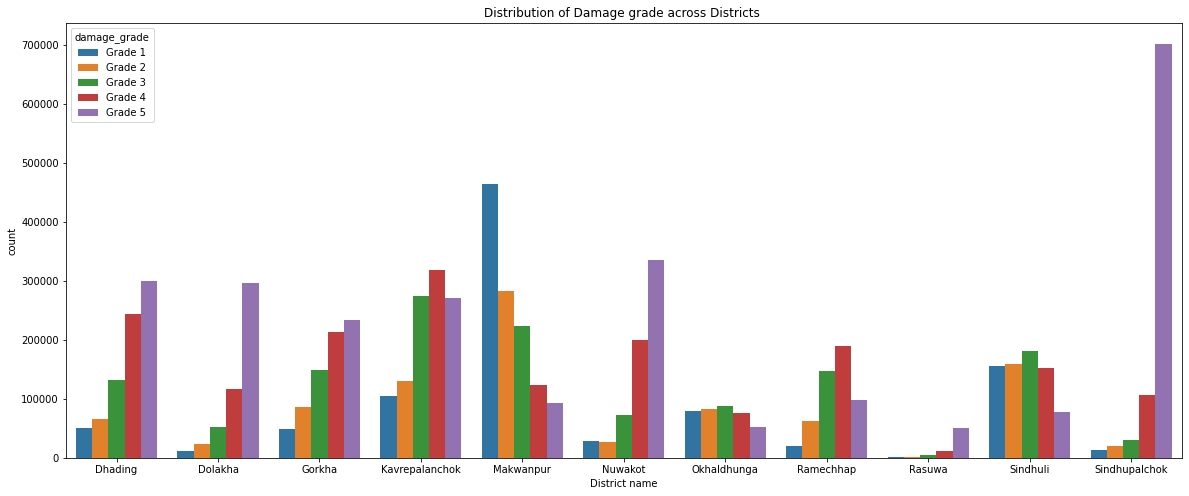

In [21]:

plt.figure(figsize=(20,8))
ax = sns.barplot(x='district_name', y='count',data=damage_districts, hue = 'damage_grade')
plt.title("Distribution of Damage grade across Districts ")
plt.xlabel("District name")
plt.show()


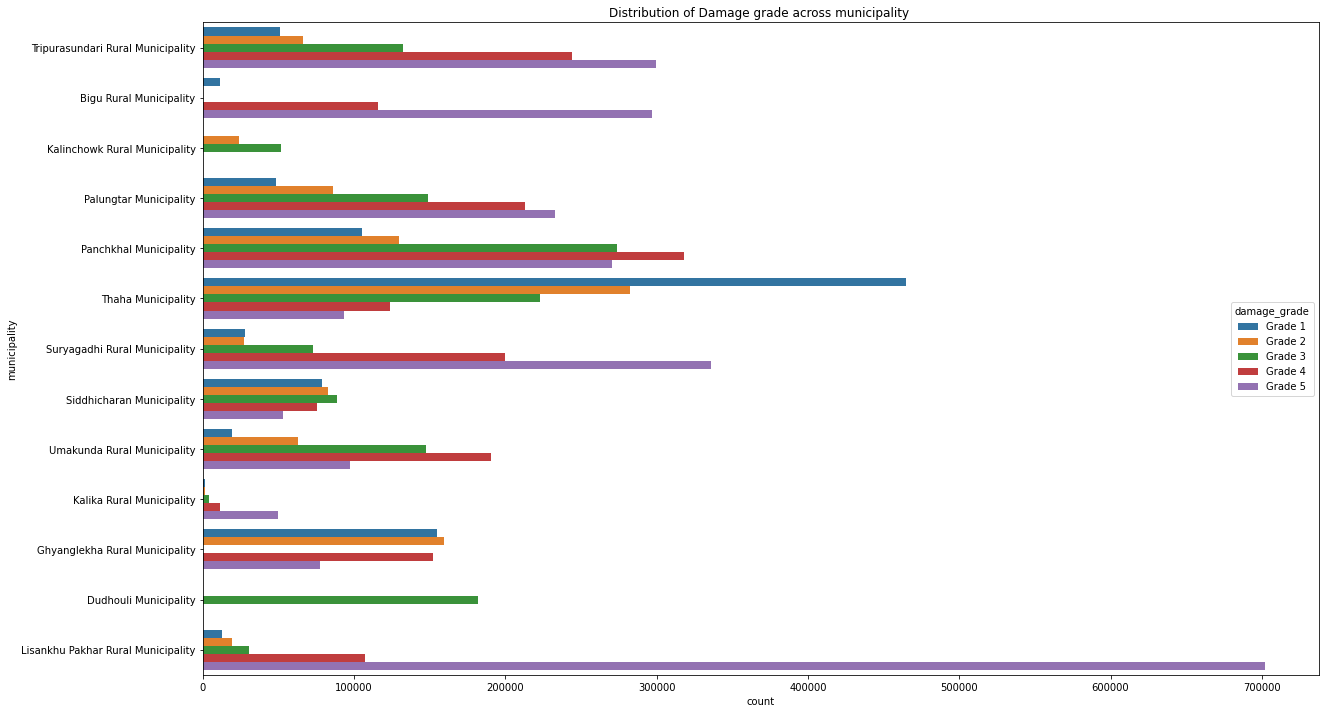

In [22]:
plt.figure(figsize=(20,12))
ax = sns.barplot(y='municipality', x='count',data=damage_districts, hue = 'damage_grade', orient = 'h')
plt.title("Distribution of Damage grade across municipality ")
plt.xlabel("count")
plt.show()


## building_damage_assessment

In [23]:
pd.read_sql("""

SELECT *
FROM building_damage_assessment;

""", conn)

,building_id,district_id,vdcmun_id,ward_id,damage_overall_collapse,damage_overall_leaning,damage_overall_adjacent_building_risk,damage_foundation_severe,damage_foundation_moderate,damage_foundation_insignificant,damage_roof_severe,damage_roof_moderate,damage_roof_insignificant,damage_corner_separation_severe,damage_corner_separation_moderate,damage_corner_separation_insignificant,damage_diagonal_cracking_severe,damage_diagonal_cracking_moderate,damage_diagonal_cracking_insignificant,damage_in_plane_failure_severe,damage_in_plane_failure_moderate,damage_in_plane_failure_insignificant,damage_out_of_plane_failure_severe,damage_out_of_plane_failure_moderate,damage_out_of_plane_failure_insignificant,damage_out_of_plane_failure_walls_ncfr_severe,damage_out_of_plane_failure_walls_ncfr_moderate,damage_out_of_plane_failure_walls_ncfr_insignificant,damage_gable_failure_severe,damage_gable_failure_moderate,damage_gable_failure_insignificant,damage_delamination_failure_severe,damage_delamination_failure_moderate,damage_delamination_failure_insignificant,damage_column_failure_severe,damage_column_failure_moderate,damage_column_failure_insignificant,damage_beam_failure_severe,damage_beam_failure_moderate,damage_beam_failure_insignificant,damage_infill_partition_failure_severe,damage_infill_partition_failure_moderate,damage_infill_partition_failure_insignificant,damage_staircase_severe,damage_staircase_moderate,damage_staircase_insignificant,damage_parapet_severe,damage_parapet_moderate,damage_parapet_insignificant,damage_cladding_glazing_severe,damage_cladding_glazing_moderate,damage_cladding_glazing_insignificant,area_assesed,damage_grade,technical_solution_proposed,has_repair_started,has_damage_foundation,has_damage_roof,has_damage_corner_separation,has_damage_diagonal_cracking,has_damage_in_plane_failure,has_damage_out_of_plane_failure,has_damage_out_of_plane_walls_ncfr_failure,has_damage_gable_failure,has_damage_delamination_failure,has_damage_column_failure,has_damage_beam_failure,has_damage_infill_partition_failure,has_damage_staircase,has_damage_parapet,has_damage_cladding_glazing,has_geotechnical_risk,has_geotechnical_risk_land_settlement,has_geotechnical_risk_fault_crack,has_geotechnical_risk_liquefaction,has_geotechnical_risk_landslide,has_geotechnical_risk_rock_fall,has_geotechnical_risk_flood,has_geotechnical_risk_other
0,120101000011,12,1207,120703,Moderate-Heavy,Insignificant/light,None,None,Moderate-Heavy-(<1/3),Insignificant/light-(<1/3),Severe-Extreme-(<1/3),None,Insignificant/light-(>2/3),Severe-Extreme-(>2/3),None,None,Severe-Extreme-(<1/3),None,None,Severe-Extreme-(>2/3),None,None,None,Moderate-Heavy-(>2/3),None,Severe-Extreme-(>2/3),None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,Both,Grade 3,Major repair,0.0,NaN,1.0,1.0,1.0,1.0,NaN,1.0,0.0,0.0,NaN,NaN,NaN,0.0,0.0,0.0,0.0,0,0,0,0,0,0,0
1,120101000021,12,1207,120703,Severe-Extreme,Severe-Extreme,Insignificant/light,Severe-Extreme-(>2/3),None,None,Severe-Extreme-(>2/3),None,None,Severe-Extreme-(>2/3),None,None,Severe-Extreme-(>2/3),None,None,Severe-Extreme-(>2/3),None,None,Severe-Extreme-(>2/3),None,None,Severe-Extreme-(>2/3),None,None,None,None,None,Severe-Extreme-(>2/3),None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,Exterior,Grade 5,Reconstruction,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,1.0,NaN,NaN,NaN,0.0,0.0,0.0,0.0,0,0,0,0,0,0,0
2,120101000031,12,1207,120703,Moderate-Heavy,Moderate-Heavy,Moderate-Heavy,None,Moderate-Heavy-(>2/3),None,None,Moderate-Heavy-(>2/3),None,None,Moderate-Heavy-(>2/3),None,None,Moderate-Heavy-(>2/3),None,None,Moderate-Heavy-(>2/3),None,None,Moderate-Heavy-(>2/3),None,None,Moderate-Heavy-(>2/3),None,None,Moderate-Heavy-(>2/3),None,None,None,Insignificant/light-(1/3-2/3),None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,Both,Grade 2,Minor repair,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,

## Looking at the repair technical solution proposed

In [24]:
solution = pd.read_sql("""

SELECT DISTINCT(technical_solution_proposed),
damage_grade, COUNT(technical_solution_proposed) as count
FROM building_damage_assessment
WHERE damage_grade IS NOT NULL
GROUP BY damage_grade, technical_solution_proposed

""", conn)

solution

,technical_solution_proposed,damage_grade,count
0,Major repair,Grade 1,384
1,Minor repair,Grade 1,26946
2,No need,Grade 1,51285
3,Reconstruction,Grade 1,200
4,Major repair,Grade 2,10383
5,Minor repair,Grade 2,73991
6,No need,Grade 2,488
7,Reconstruction,Grade 2,2395
8,Major repair,Grade 3,101292
9,Minor repair,Grade 3,9466


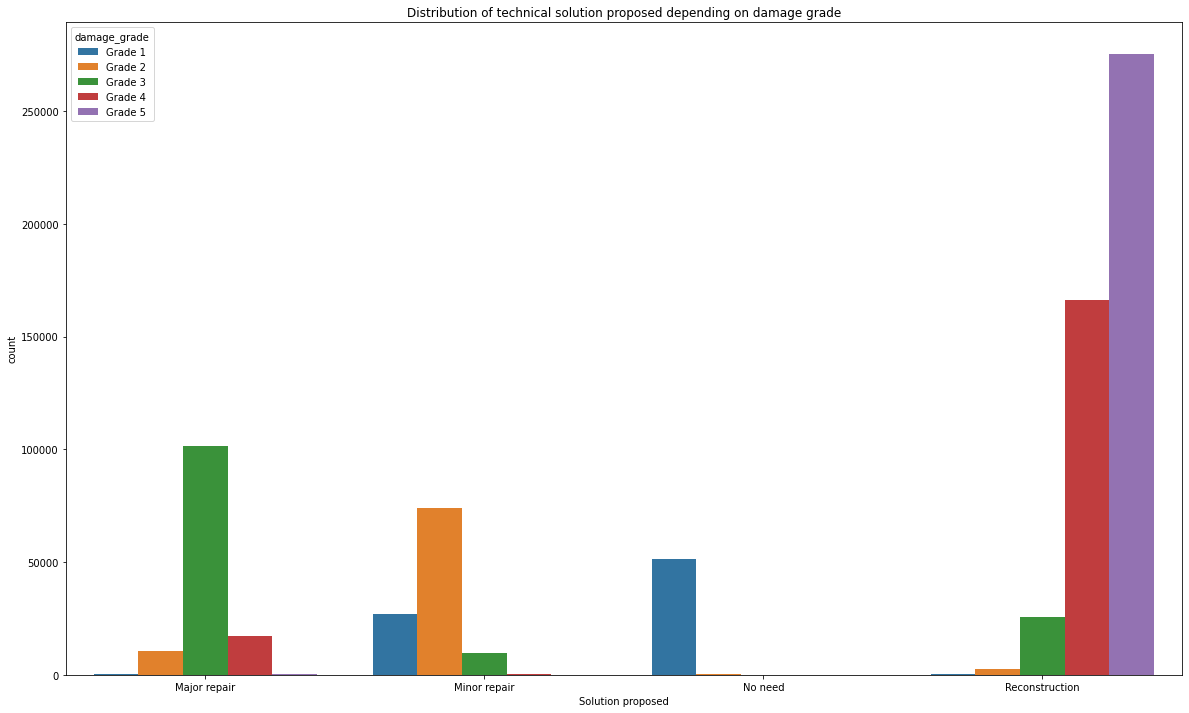

In [25]:
plt.figure(figsize=(20,12))
ax = sns.barplot(x='technical_solution_proposed',y = 'count',data=solution, hue = 'damage_grade')
plt.title("Distribution of technical solution proposed depending on damage grade")
plt.xlabel("Solution proposed")
plt.show()


In [26]:
solution2 = pd.read_sql("""

SELECT DISTINCT(technical_solution_proposed),
area_assesed, COUNT(technical_solution_proposed) as count
FROM building_damage_assessment
WHERE area_assesed IS NOT NULL 
GROUP BY area_assesed, technical_solution_proposed

""", conn)

solution2

,technical_solution_proposed,area_assesed,count
0,Major repair,Both,118241
1,Minor repair,Both,101835
2,No need,Both,45501
3,Reconstruction,Both,181097
4,Major repair,Building removed,320
5,Minor repair,Building removed,241
6,No need,Building removed,120
7,Reconstruction,Building removed,159385
8,Major repair,Exterior,9929
9,Minor repair,Exterior,7962


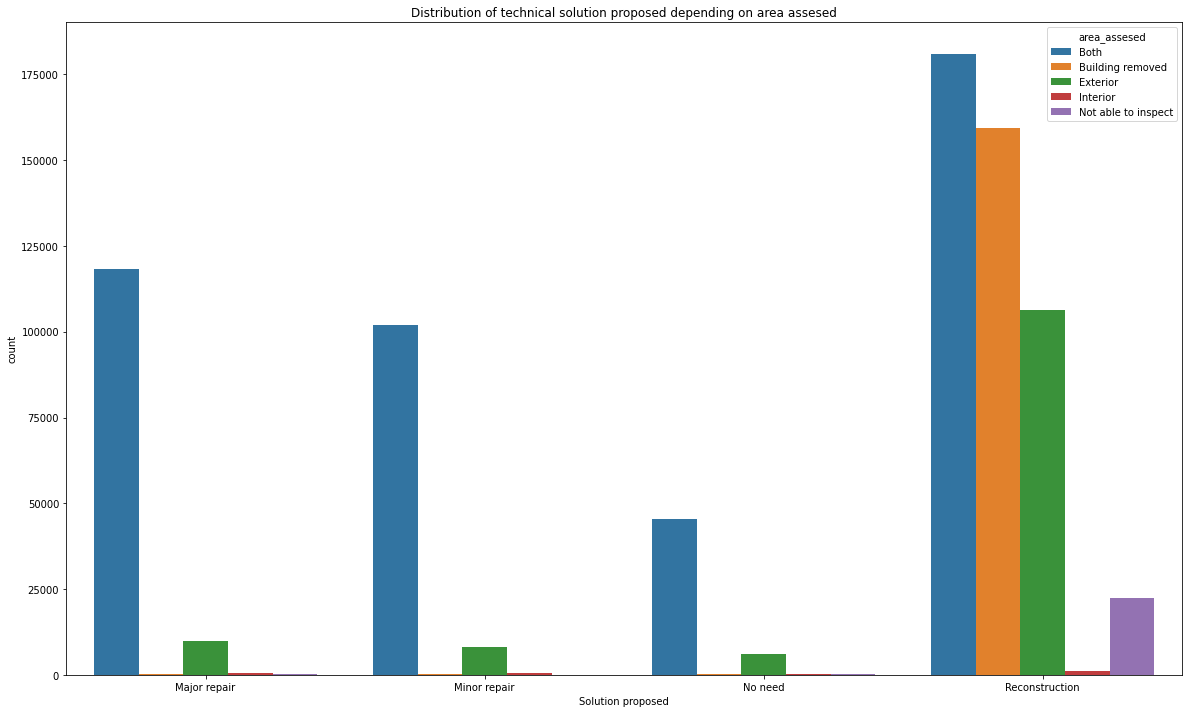

In [27]:
plt.figure(figsize=(20,12))
ax = sns.barplot(x='technical_solution_proposed',y = 'count',data=solution2, hue = 'area_assesed')
plt.title("Distribution of technical solution proposed depending on area assesed")
plt.xlabel("Solution proposed")
plt.show()


TBC ...